`Analyzing Crime in Los Angeles`

`August 2025`

This project presents an analysis of crime data in Los Angeles, focusing on identifying patterns related to the time of day, location, and victim demographics. The goal is to provide insights that can help the LAPD allocate resources more effectively and develop strategies to reduce crime rates.

`Any questions, please reach out!`

Chiawei Wang, PhD\
Data & Product Analyst\
<chiawei.w@outlook.com>

`*` Note that the table of contents and other links may not work directly on GitHub.

[Table of contents](#table-of-contents)
1. [Executive summary](#executive-summary)
   - [Challenge](#challenge)
   - [Research questions](#research-questions)
   - [Data overview](#data-overview)
   - [Approach](#approach)
   - [Results](#results)
   - [Conclusion](#conclusion)
2. [Exploratory data analysis](#exploratory-data-analysis)

# Executive summary

## Challenge

Crime is a significant concern in many urban areas, including Los Angeles. Understanding the patterns and trends in criminal activity can help law enforcement agencies allocate resources more effectively and develop strategies to reduce crime rates. This project analyzes a dataset of crimes reported in Los Angeles to uncover insights into the timing, location, and demographics of criminal activity.

## Research questions

1. Which hour has the highest frequency of crimes?
2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3.59am)?
3. How many crimes are committed against victims of different age groups?

## Data overview

| Index | Column | Type | Description |
| ----- | ------ | ---- | ----------- |
| 0     | `DR_NO` | int64 | Division of Records Number (2-digit year, area ID, and 5 digits) |
| 1     | `Date Rptd` | object | Date reported - MM/DD/YYYY |
| 2     | `DATE OCC` | object | Date of occurrence - MM/DD/YYYY |
| 3     | `TIME OCC` | int64 | In 24-hour military time |
| 4     | `AREA NAME` | object | Name of the patrol division |
| 5     | `Crm Cd Desc` | object | Indicates the crime committed |
| 6     | `Vict Age` | int64 | Victim's age in years |
| 7     | `Vict Sex` | object | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown |
| 8     | `Vict Descent` | object | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| 9     | `Weapon Desc` | object | Description of the weapon used (if applicable) |
| 10    | `Status Desc` | object | Crime status |
| 11    | `LOCATION` | object | Street address of the crime |

## Approach

1. Finding the frequencies of crimes by the hour of occurrence
2. Identifying the area with the most night crime
3. Crimes by age group

## Results

- The hour with the highest frequency of crimes is 12pm.
- The area with the largest frequency of night crimes is Central.
- The age group with the highest number of crimes is 26-34, with 47,470 incidents.

## Conclusion

The analysis of crime data in Los Angeles reveals significant patterns in criminal activity. The peak hour for crimes is midday, suggesting that law enforcement may need to increase patrols during this time. The Central area experiences the highest frequency of night crimes, indicating a need for targeted interventions in this region during late hours. Additionally, the age group most affected by crime is 26-34, highlighting the importance of focusing preventive measures and support services for this demographic. These insights can help the LAPD allocate resources more effectively and develop strategies to reduce crime rates in Los Angeles.

# Exploratory data analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the CSV as a DataFrame
df = pd.read_csv('crimes.csv')

# Preview the data
print(df.shape)
df.head()

(185715, 12)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [2]:
## Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour

# Convert the column to string type first, then extract the hour, and finally convert to integer
df['HOUR OCC'] = df['TIME OCC'].astype(str).str.zfill(4).str[:2].astype(int)

# Preview the DataFrame to confirm the new column is correct
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


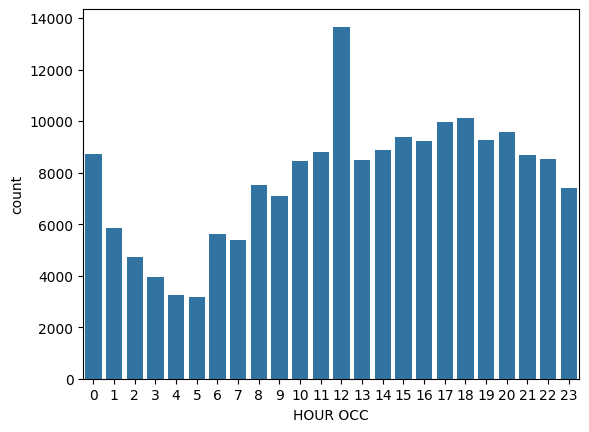

In [3]:
# Produce a countplot to find the largest frequency of crimes by hour
sns.countplot(data=df, x = 'HOUR OCC')
plt.show()

In [4]:
# Midday has the largest volume of crime
peak_crime_hour = df['HOUR OCC'].value_counts().idxmax()

# Print the result
print(f'The hour with the highest frequency of crimes is: {peak_crime_hour}')

The hour with the highest frequency of crimes is: 12


In [5]:
## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?
night_time = df[df['HOUR OCC'].isin([22, 23, 0, 1, 2, 3])]

# Group by 'AREA NAME' and count occurrences, filtering for the largest value and saving the 'AREA NAME'
peak_night_crime_location = night_time.groupby('AREA NAME', as_index = False)['HOUR OCC'].count().sort_values('HOUR OCC', ascending = False).iloc[0]['AREA NAME']

# Print the peak night crime location
print(f'The area with the largest volume of night crime is: {peak_night_crime_location}')

The area with the largest volume of night crime is: Central


In [6]:
## Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

# Add a new column using pd.cut() to bin values into discrete intervals
df['Age Bracket'] = pd.cut(df['Vict Age'], bins = age_bins, labels = age_labels)

# Find the category with the largest frequency
victim_ages = df['Age Bracket'].value_counts()
print(victim_ages.sort_index())

Age Bracket
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64
